In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# New Section

In [4]:
data_train_path = '/content/drive/MyDrive/Colab Notebooks/Fruits_Vegetables/train'
data_test_path = '/content/drive/MyDrive/Colab Notebooks/Fruits_Vegetables/test'
data_val_path = '/content/drive/MyDrive/Colab Notebooks/Fruits_Vegetables/validation'

In [5]:
img_width = 180
img_height = 180

In [6]:
# image_dataset_from_directory() - It will lead the data from directory in the form of array
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,#shuffling our dataset from the directory
    image_size=(img_width,img_height),#var
    batch_size =32,#32images
    validation_split=False #I already splitted the data otherwise I have to split it by giving 'True'.
)

Found 3127 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names
data_cat #To show all class name

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width,img_height),
    shuffle = False,
    batch_size = 32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width,img_height),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


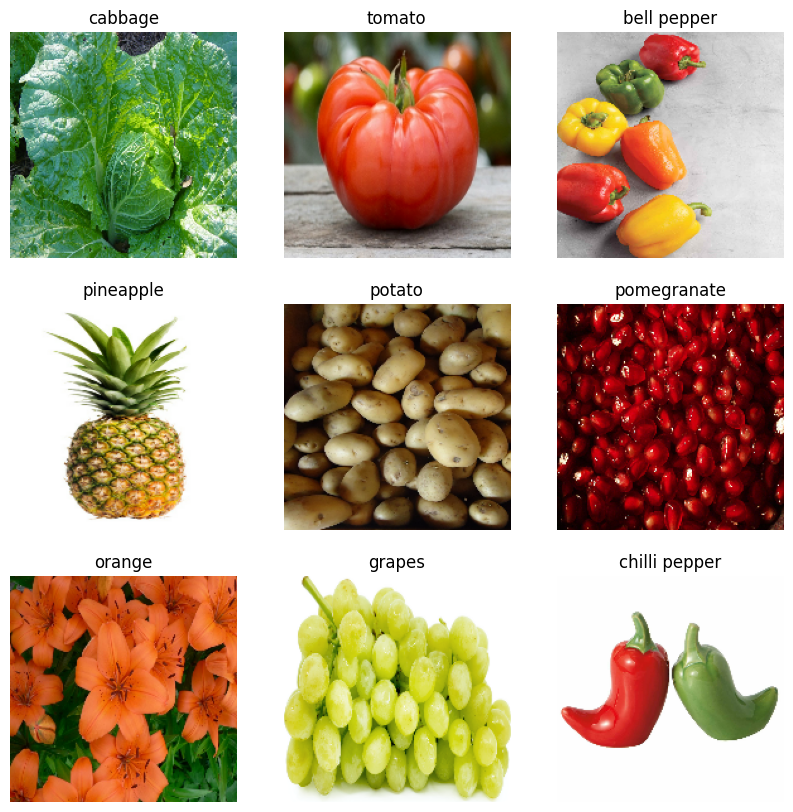

In [10]:
#
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_cat[labels[i]])
    plt.axis('off')#It will not show sub axis

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    #layer 1
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    #layer 2
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    #layer 3
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])
#Model created

In [13]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.0569 - loss: 3.7924

In [14]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

NameError: name 'epochs_size' is not defined

In [ ]:
#Take sample of image and check whether the model is predicting properly or not

In [34]:
image = '/content/drive/MyDrive/Colab Notebooks/Fruits_Vegetables/banana.jpg'
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [31]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [32]:
score = tf.nn.softmax(predict)

In [35]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is paprika with accuracy of 4.14


In [ ]:
model.save('Image_classify.keras')